# Read the Dataset

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


In [ ]:
import os
import random
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split

data_dir = "/content/drive/MyDrive/SoftCom Lab/Assignment/Assignment_Dataset"  # Replace with the path to your dataset folder

# Define data transformations (you can add more augmentations if required)
data_transforms = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize the images to a fixed size
    transforms.ToTensor(),  # Convert the images to PyTorch tensors
])

# Load the dataset using ImageFolder
dataset = ImageFolder(root=data_dir, transform=data_transforms)

# Define the sizes for training, testing, and validation sets (e.g., 70%, 15%, 15%)
train_size = int(0.7 * len(dataset))
test_size = int(0.15 * len(dataset))
val_size = len(dataset) - train_size - test_size

# Split the dataset into training, testing, and validation sets
train_dataset, test_dataset, val_dataset = random_split(dataset, [train_size, test_size, val_size])

# Create DataLoaders for training, testing, and validation sets
batch_size = 32  # Adjust this according to your available resources
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Now you should see the number of samples in each set:
print(f"Number of samples in training set: {len(train_dataset)}")
print(f"Number of samples in testing set: {len(test_dataset)}")
print(f"Number of samples in validation set: {len(val_dataset)}")



Number of samples in training set: 3673
Number of samples in testing set: 787
Number of samples in validation set: 788


In [ ]:
for i,(image,label) in enumerate(val_dataloader):
  print("Loader-",i)
  for i in label:
    print(i)
  break


Random images from the training set:


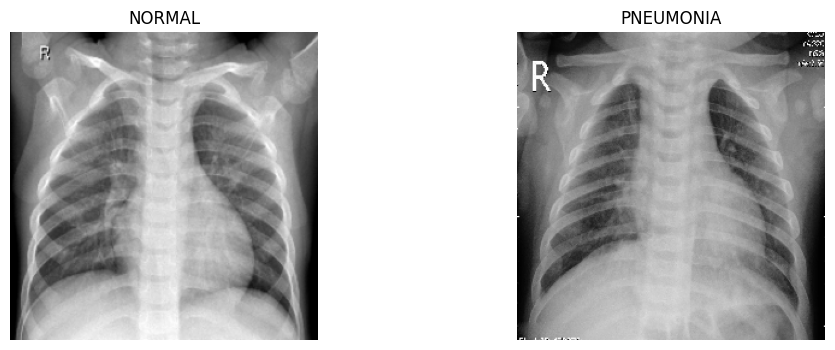

Random images from the testing set:


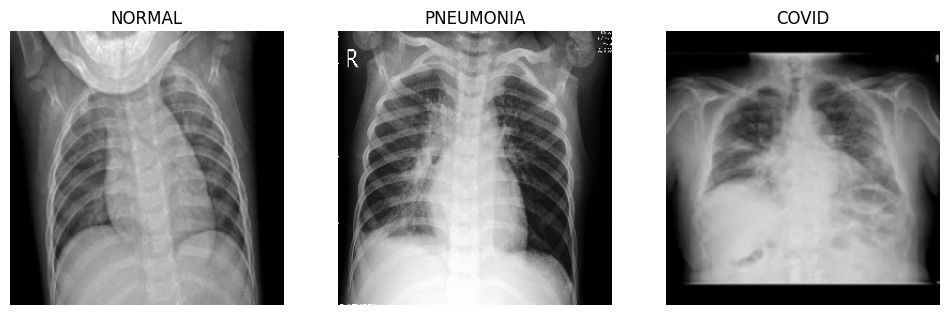

Random images from the validation set:


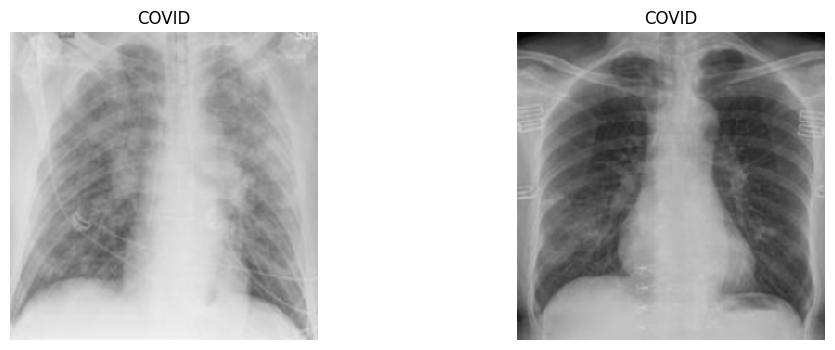

In [ ]:
import random
import matplotlib.pyplot as plt

# Function to plot random images
def plot_random_images(dataset, num_images=3):
    selected_indices = random.sample(range(len(dataset)), num_images)
    fig, axs = plt.subplots(1, num_images, figsize=(12, 4))

    for i, idx in enumerate(selected_indices):
        image, label = dataset[idx]
        axs[i].imshow(image.permute(1, 2, 0))
        axs[i].set_title(dataset.dataset.classes[label])  # Access classes attribute from the original ImageFolder dataset
        axs[i].axis("off")

    plt.show()

# Now, you can use the function to plot random images from the training, testing, or validation sets.
# For example, to plot 2 random images from the training set:
print("Random images from the training set:")
plot_random_images(train_dataset, num_images=2)

# To plot 3 random images from the testing set:
print("Random images from the testing set:")
plot_random_images(test_dataset, num_images=3)

# To plot 2 random images from the validation set:
print("Random images from the validation set:")
plot_random_images(val_dataset, num_images=2)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models


In [ ]:
torch.manual_seed(0)

In [ ]:
import torch
import torch.nn as nn

class NeuralNetwork(nn.Module):
    def __init__(self, num_classes):
        super(NeuralNetwork, self).__init__()
        self.cnn_layer_1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.cnn_layer_2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)

        self.flatten = nn.Flatten()
        self.maxpool = nn.MaxPool2d(2, 2)

        self.linear_layer_1 = nn.Linear(32 * 64 * 64, 1024)
        self.linear_layer_2 = nn.Linear(1024, 512)
        self.linear_layer_3 = nn.Linear(512, num_classes)

        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.1)

    def forward(self, x):
        x = self.cnn_layer_1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.maxpool(x)

        x = self.cnn_layer_2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.maxpool(x)


        x = self.flatten(x)

        x = self.linear_layer_1(x)
        x = self.relu(x)
        x = self.dropout(x)

        x = self.linear_layer_2(x)
        x = self.relu(x)
        x = self.dropout(x)

        x = self.linear_layer_3(x)
        return x

# Create an instance of the modified NeuralNetwork
model = NeuralNetwork(num_classes=3)
print(model)


NeuralNetwork(
  (cnn_layer_1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (cnn_layer_2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (linear_layer_1): Linear(in_features=131072, out_features=1024, bias=True)
  (linear_layer_2): Linear(in_features=1024, out_features=512, bias=True)
  (linear_layer_3): Linear(in_features=512, out_features=3, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
)


In [ ]:
print(model)

In [ ]:
!pip install torchsummary

In [ ]:

from torchsummary import summary
import torch

# Create an instance of the modified NeuralNetwork
model = NeuralNetwork(num_classes=3)

# Specify the input size
input_size = (3, 256, 256)  # (channels, height, width)

# Print the model summary
summary(model, input_size=input_size, device='cpu')


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 256, 256]             448
              ReLU-2         [-1, 16, 256, 256]               0
           Dropout-3         [-1, 16, 256, 256]               0
         MaxPool2d-4         [-1, 16, 128, 128]               0
            Conv2d-5         [-1, 32, 128, 128]           4,640
              ReLU-6         [-1, 32, 128, 128]               0
           Dropout-7         [-1, 32, 128, 128]               0
         MaxPool2d-8           [-1, 32, 64, 64]               0
           Flatten-9               [-1, 131072]               0
           Linear-10                 [-1, 1024]     134,218,752
             ReLU-11                 [-1, 1024]               0
          Dropout-12                 [-1, 1024]               0
           Linear-13                  [-1, 512]         524,800
             ReLU-14                  [

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

In [ ]:

num_epochs = 20  # Adjust the number of epochs as needed
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for i,(inputs, labels) in enumerate(train_dataloader):
        inputs, labels = inputs.to(device), labels.to(device)
        #print("Iteration is : ",i)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Epoch [{epoch+1}/{num_epochs}], Validation Accuracy: {accuracy:.4f}')

print("Training complete!")

Epoch [1/20], Validation Accuracy: 96.8601
Epoch [2/20], Validation Accuracy: 97.4310
Epoch [3/20], Validation Accuracy: 97.1456
Epoch [4/20], Validation Accuracy: 97.2407
Epoch [5/20], Validation Accuracy: 96.8601
Epoch [6/20], Validation Accuracy: 94.7669
Epoch [7/20], Validation Accuracy: 97.3359
Epoch [8/20], Validation Accuracy: 97.4310
Epoch [9/20], Validation Accuracy: 96.2892
Epoch [10/20], Validation Accuracy: 95.7184
Epoch [11/20], Validation Accuracy: 95.7184
Epoch [12/20], Validation Accuracy: 94.1009
Epoch [13/20], Validation Accuracy: 96.7650
Epoch [14/20], Validation Accuracy: 96.2892
Epoch [15/20], Validation Accuracy: 96.7650
Epoch [16/20], Validation Accuracy: 95.9087
Epoch [17/20], Validation Accuracy: 96.9553
Epoch [18/20], Validation Accuracy: 97.5262
Epoch [19/20], Validation Accuracy: 96.7650
Epoch [20/20], Validation Accuracy: 95.2426
Training complete!


In [ ]:
# Evaluation on the test set
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_dataloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Accuracy on the test set: {accuracy:.2f}%")

Accuracy on the test set: 97.33%
